### CREDENTIALS

In [1]:
IG_LINK = 'https://www.instagram.com/'

USERNAME = input('Enter your Ig Handle: ')
PASSWORD = input('Enter your Ig Password: ')

Enter your Ig Handle: 9anubhavtyagi
Enter your Ig Password: GAX@instagram-9


### Module Imports

In [2]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

from selenium.webdriver.support.select import Select
from selenium.common import exceptions as SCE

import time

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Starting session

In [4]:
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)

driver.maximize_window()



====== WebDriver manager ======
Current google-chrome version is 97.0.4692
Get LATEST chromedriver version for 97.0.4692 google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/97.0.4692.71/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\anubh\.wdm\drivers\chromedriver\win32\97.0.4692.71]


**wait object**

In [5]:
wait = WebDriverWait(driver, 10)

# 1.) a. From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

### login function

In [6]:
def log_in(driver, wait, username, password):
    # visit instagram
    driver.get(IG_LINK)
    time.sleep(3)
    
    # wait until log-in form is loaded -> by checking username box
    wait.until(EC.presence_of_element_located((By.NAME, 'username')))
    
    username_box = driver.find_element(By.NAME, 'username')
    username_box.send_keys(username)
    
    password_box = driver.find_element(By.NAME, 'password')
    password_box.send_keys(password)
    
    password_box.submit()
    time.sleep(3)
    
    
    # avoid save login info
    try:
        # wait until or if save login info option appears
        wait.until(EC.presence_of_element_located((By.CLASS_NAME, 'y3zKF')))
        ele = driver.find_element(By.CLASS_NAME, 'y3zKF')
        ele.click()
        
    except:
        print('No login info save option appears')
    
    
    time.sleep(2)
    

    # avoid turning on notifications
    try:
        # wait until or if turn-on notifications option appears
        wait.until(EC.presence_of_element_located((By.CLASS_NAME, 'HoLwm')))
        ele = driver.find_element(By.CLASS_NAME, 'HoLwm')
        ele.click()
        
    except:
        print('No turn-on notifications option appears')


## LOGIN

In [7]:
log_in(driver, wait, USERNAME, PASSWORD)

### function to search

In [8]:
def search(driver, wait, text):
    # wait for search_box
    wait.until(EC.presence_of_element_located((By.XPATH, '//input[@placeholder="Search"]')))
    
    # Enter text in search_box
    search_box = driver.find_element(By.XPATH, '//input[@placeholder="Search"]')
    search_box.clear()
    search_box.send_keys(text)
    
    time.sleep(3)

## Search food

In [9]:
search(driver, wait, 'food')

### function to get search result handles link

In [10]:
def get_search_result_handle_links(driver):
    # list to store links
    handles_link = []
    
    # find anchor tags of search result
    ele_list = driver.find_elements(By.XPATH, '//div[@class = "_01UL2"]/div/div/a')
    
    # extract links and put them in list (avoid tags)
    for ele in ele_list:
        link = ele.get_attribute('href')
        if '/tags/' not in link:
            handles_link.append(link)
            
    return handles_link

## Get Handle links

In [11]:
food_handle_links = get_search_result_handle_links(driver)[:10]
food_handle_links = np.array(food_handle_links)
# print(*food_handles_link, sep='\n')

### function to get name of handle from link

In [12]:
def get_handle_name_from_link(handle_link):
    return handle_link[26:len(handle_link) -1]

### Extract handle name from links

In [13]:
food_handle_names = []

for link in food_handle_links:
    food_handle_names.append(get_handle_name_from_link(link))
    
food_handle_names = np.array(food_handle_names)

In [14]:
food_handle_names

array(['foodtalkindia', 'delhi_street_food1', 'foodie_incarnate',
       'dilsefoodie', 'food_fetish17', 'food_food_delhi', 'food',
       'delhi_streets_food', 'food_lunatic', 'delhifoodwalks'],
      dtype='<U18')

### function to get followers count

In [15]:
def get_followers_count(driver, wait, handle_link):
    driver.get(handle_link)
    time.sleep(3)
    
    # handles name from link
    handle_name = handle_link[26:len(handle_link) -1]
    
    # wait for followers count to be loaded on page
    wait.until(EC.presence_of_element_located((By.XPATH, f'//a[@href = "/{handle_name}/followers/"]/span')))

    # followers count
    followers_count = driver.find_element(By.XPATH, f'//a[@href = "/{handle_name}/followers/"]/span').text
    
    # convert followers count to numeric
    if followers_count[-1] == 'k':
        followers_count = float(followers_count[:len(followers_count) -1])*1000
    elif followers_count[-1] == 'm':
        followers_count = float(followers_count[:len(followers_count) -1])*1000000
    else:
        followers_count = float(followers_count)
  

    return int(followers_count)


## fetch handle details

In [16]:
food_handle_followers_counts = []

for link in food_handle_links:
    food_handle_followers_counts.append(get_followers_count(driver, wait, link))
    
food_handle_followers_counts = np.array(food_handle_followers_counts)

In [17]:
food_handle_followers_counts

array([ 307000,   54700, 1100000,  962000,     523,   65400,  158000,
         32600,  128000,  159000])

## Top 5 handles

In [18]:
# sorted indices based on followers count
sorted_indices = food_handle_followers_counts.argsort()[::-1]

top_5_food_handle_names = food_handle_names[sorted_indices][:5]
top_5_food_handle_links = food_handle_links[sorted_indices][:5]
top_5_food_handle_followers_counts = food_handle_followers_counts[sorted_indices][:5]


In [19]:
for i in range(5):
    print(f"{top_5_food_handle_names[i]} --> {top_5_food_handle_followers_counts[i]}")

foodie_incarnate --> 1100000
dilsefoodie --> 962000
foodtalkindia --> 307000
delhifoodwalks --> 159000
food --> 158000


# 1.) b. Now Find the number of posts these handles have done in the previous 3 days.

In [20]:
# stroing top_5_food_handle_links in food_handle_links
food_handle_links = top_5_food_handle_links

# stroing top_5_food_handle_names in food_handle_names
food_handle_names = top_5_food_handle_names

# stroing top_5_food_handle_followers_counts in food_handle_followers_counts
food_handle_followers_counts = top_5_food_handle_followers_counts

### function to get last 'n' days post

In [21]:
def get_last_n_days_post_count(driver, wait, handle_link, num_days):
    post_count = 0
    i = 1
    
    while True:
        driver.get(handle_link)
        time.sleep(3)
        
        # wait for posts to be loaded
        wait.until(EC.presence_of_element_located((By.XPATH, '//*[@id="react-root"]/section/main/div/div[3]/article/div[1]/div/div/div/a')))

        # load posts
        posts_arr = driver.find_elements(By.XPATH, '//*[@id="react-root"]/section/main/div/div[3]/article/div[1]/div/div/div/a')
        
        # until ith post is not loaded in page run below code
        while i > len(posts_arr):
            # scroll
            curr_page_height = driver.execute_script('return document.body.scrollHeight;')
            driver.execute_script(f'window.scrollTo(0, {curr_page_height});')
            time.sleep(2)
            
            # again load posts
            posts_arr = driver.find_elements(By.XPATH, '//*[@id="react-root"]/section/main/div/div[3]/article/div[1]/div/div/div/a')
            
        
        #click on ith post
        posts_arr[i-1].click()
        time.sleep(3)
        
        # wait for time string
        wait.until(EC.presence_of_element_located((By.XPATH, '/html/body/div[6]/div[3]/div/article/div/div[2]/div/div/div[2]/div[2]/a/time')))
            
        # extract time_string
        time_string = driver.find_element(By.XPATH, '/html/body/div[6]/div[3]/div/article/div/div[2]/div/div/div[2]/div[2]/a/time').text
        
        # extract number and unit of time from time string
        number, unit, _ = time_string.split()
        number = int(number)
        
        
        # if unit is hour, min, or sec --> increment post_count 
        if 'HOUR' in unit or 'MIN' in unit or 'SEC' in unit:
            post_count += 1
        
        # if unit is day, but less than or equal to num_days --> increment post_count
        elif 'DAY' in unit and number <= num_days:
            post_count += 1
            
        # otherwise break the loop
        else:
            break
        
        i += 1
        
    return post_count

### fetch last 3 days post counts

In [22]:
food_handle_posts_counts = []

for link in food_handle_links:
    food_handle_posts_counts.append(get_last_n_days_post_count(driver, wait, link, 3))
    
food_handle_posts_counts = np.array(food_handle_posts_counts)
food_handle_posts_counts

array([5, 3, 3, 9, 1])

## Top 3 food handles by posts count

In [23]:
# sorted indices based on followers count
sorted_indices = food_handle_posts_counts.argsort()[::-1]

top_3_food_handle_names = food_handle_names[sorted_indices][:3]
top_3_food_handle_links = food_handle_links[sorted_indices][:3]
top_3_food_handle_posts_counts = food_handle_posts_counts[sorted_indices][:3]
top_3_food_handle_followers_counts = food_handle_followers_counts[sorted_indices][:3]


In [24]:
for i in range(3):
    print(f"{top_3_food_handle_names[i]} --> {top_3_food_handle_posts_counts[i]}")

delhifoodwalks --> 9
foodie_incarnate --> 5
foodtalkindia --> 3


# 1.) c. Depict above information using a suitable graphs.

## Bar Graph of handles and their followers count

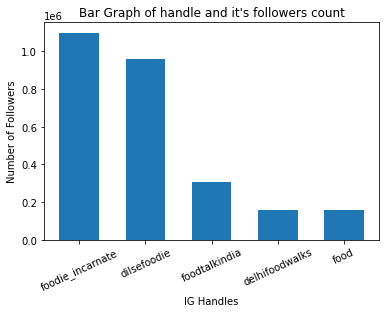

In [25]:
plt.bar(top_5_food_handle_names, top_5_food_handle_followers_counts, width=0.6)

# Naming graph
plt.title('Bar Graph of handles and their followers count')
plt.xlabel('IG Handles')
plt.ylabel('Number of Followers')

# rotate x-axis labels
plt.xticks(rotation=25)

plt.show()

## Bubble chart of handle and their  last 3 days posts (with followers count as weight)

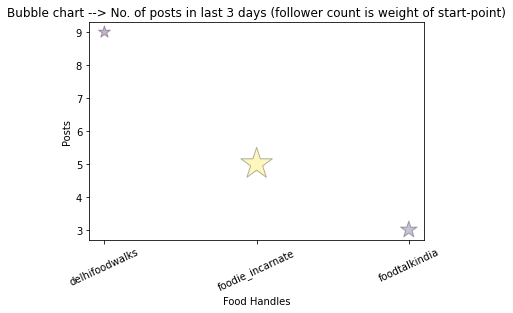

In [26]:
plt.scatter(top_3_food_handle_names, top_3_food_handle_posts_counts, s = top_3_food_handle_followers_counts/1000, c = top_3_food_handle_followers_counts, alpha = 0.3, marker='*', edgecolor='black')

plt.title('Bubble chart --> No. of posts in last 3 days (follower count is weight of start-point)')
plt.xlabel('Food Handles')
plt.ylabel('Posts')

plt.xticks(rotation = 25)
plt.show()

# Storing above found data

#### so that I can use this data in other python notebooks

## Top 5 data

In [28]:
df = pd.DataFrame({'handle_name': top_5_food_handle_names,
                   'followers_count': top_5_food_handle_followers_counts,
                   'handle_link': top_5_food_handle_links
                  })

df

,handle_name,followers_count,handle_link
0,foodie_incarnate,1100000,https://www.instagram.com/foodie_incarnate/
1,dilsefoodie,962000,https://www.instagram.com/dilsefoodie/
2,foodtalkindia,307000,https://www.instagram.com/foodtalkindia/
3,delhifoodwalks,159000,https://www.instagram.com/delhifoodwalks/
4,food,158000,https://www.instagram.com/food/


In [29]:
df.to_csv("top5.csv")

## Top 3 data

In [30]:
df = pd.DataFrame({'handle_name': top_3_food_handle_names,
                   'followers_count': top_3_food_handle_followers_counts,
                   'last_3_days_posts_count': top_3_food_handle_posts_counts,
                   'handle_link': top_3_food_handle_links
                  })

df

,handle_name,followers_count,last_3_days_posts_count,handle_link
0,delhifoodwalks,159000,9,https://www.instagram.com/delhifoodwalks/
1,foodie_incarnate,1100000,5,https://www.instagram.com/foodie_incarnate/
2,foodtalkindia,307000,3,https://www.instagram.com/foodtalkindia/


In [31]:
df.to_csv("top3.csv")